In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
#creating the data frame
df=pd.read_csv("maternityb50.csv")

In [3]:
#shape of data frame
df.shape

(30, 3)

In [4]:
#look at the table and its column heads
df.head()

,kg _x_100,Nu_of_Mins,time_24hrs
0,2.00,76.8,128
1,1.35,62.4,104
2,1.55,63.0,105
3,1.53,68.4,114
4,1.45,93.0,155


In [5]:
#looking at the bottom files of dataframe
df.tail()

,kg _x_100,Nu_of_Mins,time_24hrs
25,1.88,1022.4,1704
26,1.35,1052.4,1754
27,1.70,1113.6,1856
28,1.45,1287.0,2145
29,1.80,1344.0,2240


In [6]:
#get info on data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kg _x_100   30 non-null     float64
 1   Nu_of_Mins  30 non-null     float64
 2   time_24hrs  30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
#describe basic statistics of dataframe df
df.describe()

,kg _x_100,Nu_of_Mins,time_24hrs
count,30.000000,30.000000,30.000000
mean,1.609333,588.940000,981.566667
std,0.281412,383.827968,639.713281
min,1.240000,62.400000,104.000000
25%,1.385000,245.400000,409.000000
50%,1.515000,548.700000,914.500000
75%,1.800000,926.250000,1543.750000
max,2.200000,1344.000000,2240.000000


In [8]:
#check for null or missing values 
df.isnull()

,kg _x_100,Nu_of_Mins,time_24hrs
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [9]:
#zero indicates no missing values in specified columns
df.isnull().sum()

kg _x_100     0
Nu_of_Mins    0
time_24hrs    0
dtype: int64

In [10]:
#number of missing values
df.isnull().sum().sum()

0

In [11]:
#to remove missing values
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [12]:
#drop last column since we do not need it
df.drop(["time_24hrs"],axis=1,inplace=True)
df.head()

,kg _x_100,Nu_of_Mins
0,2.00,76.8
1,1.35,62.4
2,1.55,63.0
3,1.53,68.4
4,1.45,93.0


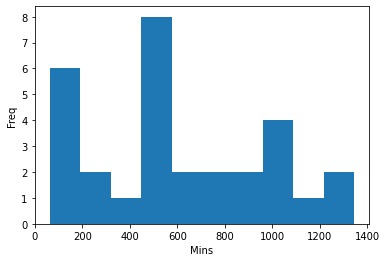

In [13]:
#build histogram to see dist of mins 
plt.hist(df['Nu_of_Mins'])
plt.xlabel('Mins')
plt.ylabel('Freq')
plt.show()


In [14]:
#specify x and y in 2D as required
#x
x=np.array(df["kg _x_100"]).reshape(-1,1)
print(x)

[[2.  ]
 [1.35]
 [1.55]
 [1.53]
 [1.45]
 [1.25]
 [2.15]
 [1.6 ]
 [1.65]
 [1.24]
 [1.45]
 [1.3 ]
 [2.2 ]
 [1.5 ]
 [1.4 ]
 [1.45]
 [1.38]
 [1.48]
 [1.34]
 [1.9 ]
 [1.75]
 [1.8 ]
 [2.2 ]
 [1.8 ]
 [1.38]
 [1.88]
 [1.35]
 [1.7 ]
 [1.45]
 [1.8 ]]


In [15]:
#y as 1D
y=np.array(df["Nu_of_Mins"])
print(y)

[  76.8   62.4   63.    68.4   93.   123.   201.6  204.6  367.8  450.
  452.4  481.2  498.   504.6  547.2  550.2  562.8  600.   666.6  736.2
  745.8  920.4  928.2  969.   975.6 1022.4 1052.4 1113.6 1287.  1344. ]


In [16]:
#divide the data into three
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100)

In [17]:
#check shapes
print(f"x_train length: {len(x_train)}\nx_test length: {len(x_test)}\ny_train length: {len(y_train)}\ny_test length: {len(y_test)}")

x_train length: 22
x_test length: 8
y_train length: 22
y_test length: 8


#Import Random Forest Regressor from scikit learn

In [18]:
from sklearn.ensemble import RandomForestRegressor

Create object RF

In [19]:
rf=RandomForestRegressor(n_estimators=100,max_features=1,max_depth=5,random_state=18)

In [20]:
#fit the parameter
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features=1, random_state=18)

In [21]:
#predictions
y_hat=rf.predict(x_test)

print(x_test)

print(y_hat)

[[1.24]
 [1.35]
 [1.45]
 [1.5 ]
 [1.25]
 [2.2 ]
 [1.7 ]
 [1.88]]
[486.28751429 285.41281429 390.26954805 467.25473377 486.28751429
 698.556      679.97470519 845.86609091]


In [22]:
#get the mean squared error
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error: {mean_squared_error(y_test,y_hat)}")

Mean Squared Error: 223312.74295371067


In [23]:
print(f"MSE root: {np.sqrt(mean_squared_error(y_test,y_hat))}")

MSE root: 472.5597771221231


In [24]:
#one prediction
p=np.array([1.7,1.45,1.8]).reshape(-1,1)
print(rf.predict(p)/60)


[11.33291175  6.50449247 17.86393175]


Enhancing our model to do better

In [25]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [26]:
##Define Grid
from datetime import datetime


grid={
    'n_estimators':[200,300,400,500],
    'max_features':['sqrt','log2'],
    'max_depth':[3,4,5,6,7],
    'random_state':[18]
}

#show start time
print(datetime.now())

#grid search function
CV_rfr=GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid,cv=5)
CV_rfr.fit(x_train,y_train)

#end time
print(datetime.now())

2022-09-08 22:53:52.232214
2022-09-08 22:55:11.143925


In [27]:
CV_rfr.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [200, 300, 400, 500],
  'max_features': ['sqrt', 'log2'],
  'max_depth': [3, 4, 5, 6, 7],
  'random_state': [18]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [32]:
print(x_test)
prediction=CV_rfr.predict(x_test)
print(prediction/60)

[[1.24]
 [1.35]
 [1.45]
 [1.5 ]
 [1.25]
 [2.2 ]
 [1.7 ]
 [1.88]]
[ 7.78788962  7.02172023  7.27477097  6.66482321  7.78788962 11.27321417
 11.63726175 13.63610641]


In [36]:
print(f"Score: {CV_rfr.score(x_train,y_train)*100:.2f} %")

Score: 70.40 %
